In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-football-results-18722024/Match_Results.csv
/kaggle/input/global-football-results-18722024/Penalty_Shootouts.csv
/kaggle/input/global-football-results-18722024/Goal_Scorers.csv


In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
goal_scorer_df = pd.read_csv('/kaggle/input/global-football-results-18722024/Goal_Scorers.csv')
match_result_df = pd.read_csv('/kaggle/input/global-football-results-18722024/Match_Results.csv')
penalty_shootout_df = pd.read_csv('/kaggle/input/global-football-results-18722024/Penalty_Shootouts.csv')

In [3]:
# Display the first few rows of each dataset
print("Goal Scorer Dataset:")
goal_scorer_df.head()

Goal Scorer Dataset:


,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [4]:
print("\nMatch Result Dataset:")
match_result_df.head()



Match Result Dataset:


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
print("\nPenalty Shootout Dataset:")
penalty_shootout_df.head()


Penalty Shootout Dataset:


,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


In [6]:
# Inspect Goal Scorer dataset
print(goal_scorer_df.info())
print(goal_scorer_df.describe())
print(goal_scorer_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44362 entries, 0 to 44361
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44362 non-null  object 
 1   home_team  44362 non-null  object 
 2   away_team  44362 non-null  object 
 3   team       44362 non-null  object 
 4   scorer     44313 non-null  object 
 5   minute     44103 non-null  float64
 6   own_goal   44362 non-null  bool   
 7   penalty    44362 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.1+ MB
None
             minute
count  44103.000000
mean      50.012698
std       26.358013
min        1.000000
25%       28.000000
50%       51.000000
75%       73.000000
max      122.000000
date           0
home_team      0
away_team      0
team           0
scorer        49
minute       259
own_goal       0
penalty        0
dtype: int64


In [7]:
# Inspect Match Result dataset
print(match_result_df.info())
print(match_result_df.describe())
print(match_result_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47399 entries, 0 to 47398
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        47399 non-null  object
 1   home_team   47399 non-null  object
 2   away_team   47399 non-null  object
 3   home_score  47399 non-null  int64 
 4   away_score  47399 non-null  int64 
 5   tournament  47399 non-null  object
 6   city        47399 non-null  object
 7   country     47399 non-null  object
 8   neutral     47399 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.9+ MB
None
         home_score    away_score
count  47399.000000  47399.000000
mean       1.759784      1.182915
std        1.775093      1.401597
min        0.000000      0.000000
25%        1.000000      0.000000
50%        1.000000      1.000000
75%        2.000000      2.000000
max       31.000000     21.000000
date          0
home_team     0
away_team     0
home_score    0
away_score    0
to

In [8]:
# Inspect Penalty Shootout dataset
print(penalty_shootout_df.info())
print(penalty_shootout_df.describe())
print(penalty_shootout_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           644 non-null    object
 1   home_team      644 non-null    object
 2   away_team      644 non-null    object
 3   winner         644 non-null    object
 4   first_shooter  230 non-null    object
dtypes: object(5)
memory usage: 25.3+ KB
None
              date     home_team away_team     winner first_shooter
count          644           644       644        644           230
unique         567           181       189        175            87
top     2024-03-26  South Africa     Egypt  Argentina      Colombia
freq             5            18        15         15            11
date               0
home_team          0
away_team          0
winner             0
first_shooter    414
dtype: int64


In [9]:
# Convert 'date' columns to datetime in all datasets
goal_scorer_df['date'] = pd.to_datetime(goal_scorer_df['date'])
match_result_df['date'] = pd.to_datetime(match_result_df['date'])
penalty_shootout_df['date'] = pd.to_datetime(penalty_shootout_df['date'])


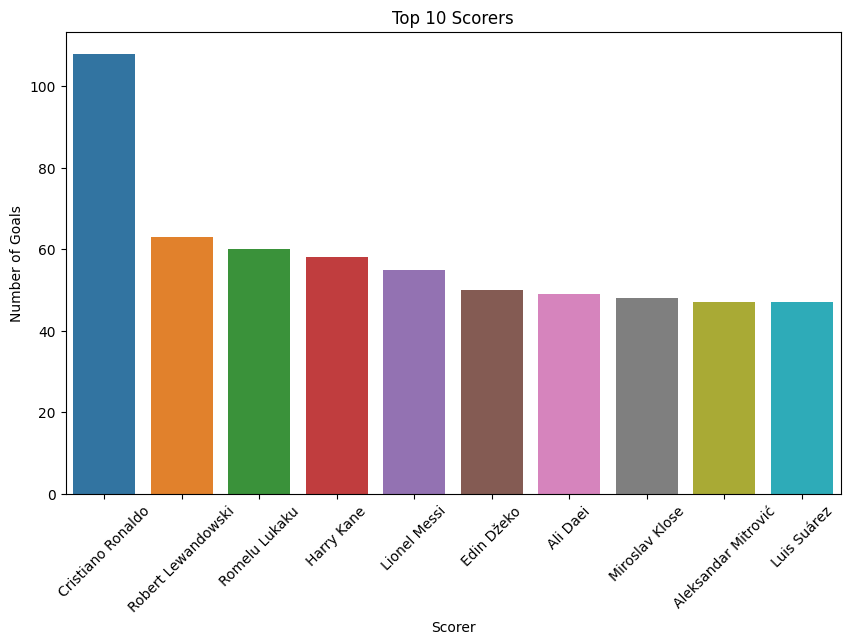

In [10]:
# Top 10 scorers
top_scorers = goal_scorer_df['scorer'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_scorers.index, y=top_scorers.values)
plt.title('Top 10 Scorers')
plt.xlabel('Scorer')
plt.ylabel('Number of Goals')
plt.xticks(rotation=45)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


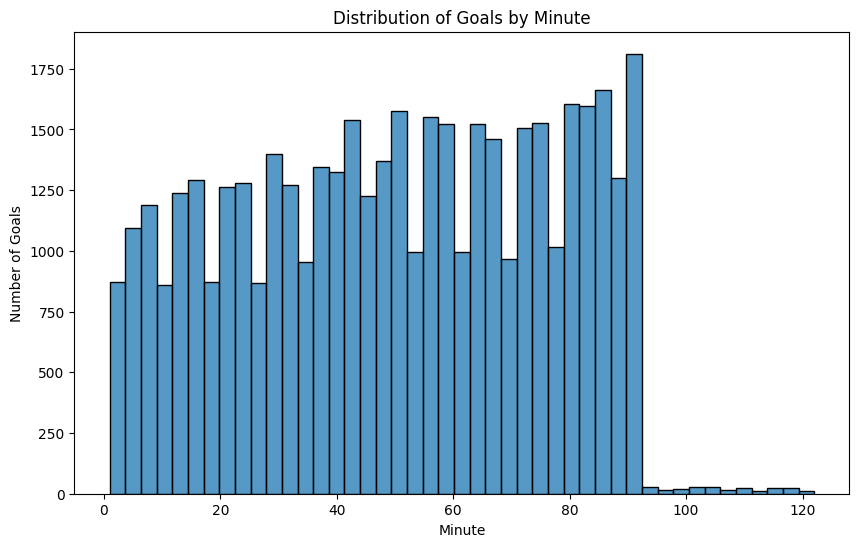

In [11]:
# Plot the distribution of goals scored by minute
plt.figure(figsize=(10, 6))
sns.histplot(goal_scorer_df['minute'], bins=45)
plt.title('Distribution of Goals by Minute')
plt.xlabel('Minute')
plt.ylabel('Number of Goals')
plt.show()


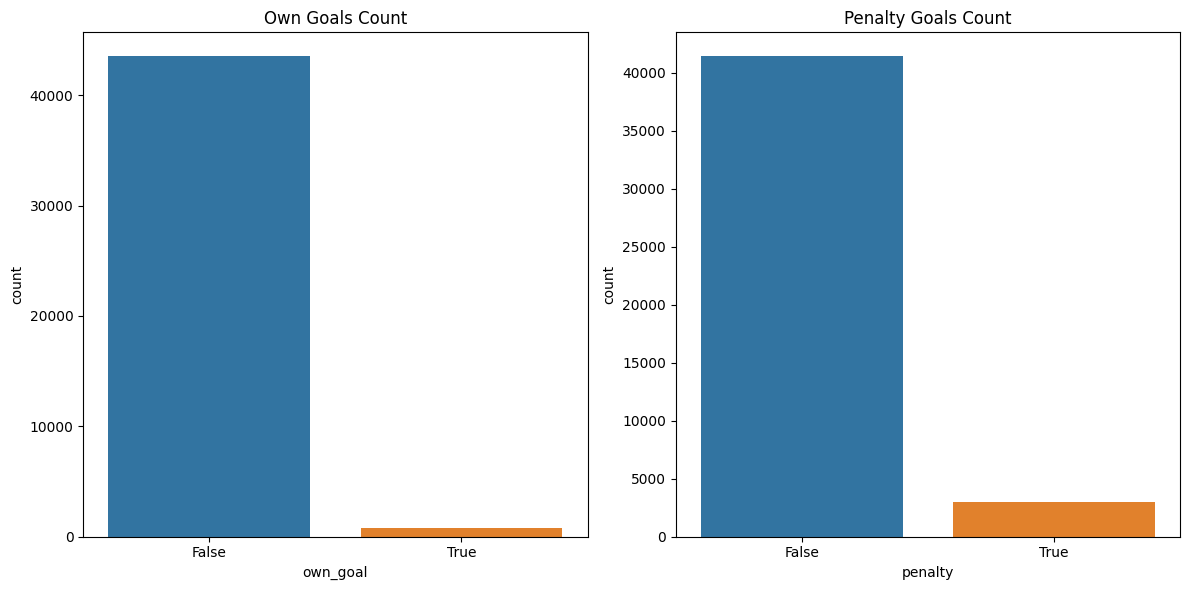

In [12]:
# Plot the count of own goals and penalty goals
plt.figure(figsize=(12, 6))

# Own goals
plt.subplot(1, 2, 1)
sns.countplot(x='own_goal', data=goal_scorer_df)
plt.title('Own Goals Count')

# Penalty goals
plt.subplot(1, 2, 2)
sns.countplot(x='penalty', data=goal_scorer_df)
plt.title('Penalty Goals Count')

plt.tight_layout()
plt.show()


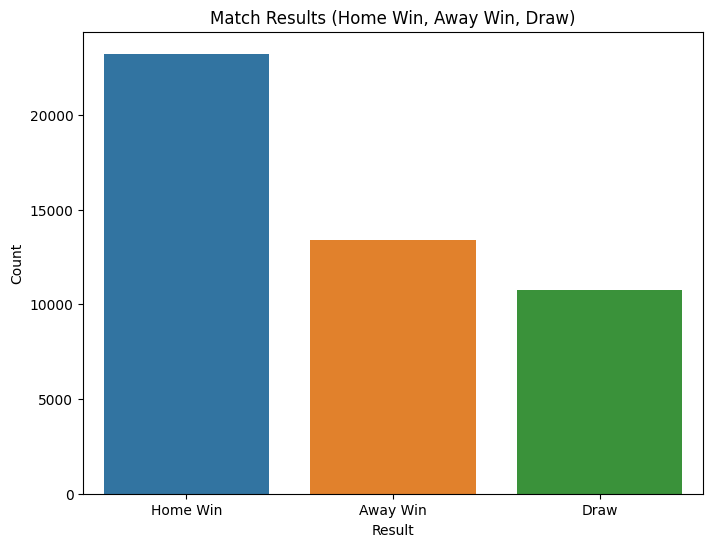

In [13]:
# Count home team wins, away team wins, and draws
match_result_df['result'] = match_result_df.apply(lambda x: 'Draw' if x['home_score'] == x['away_score'] else ('Home Win' if x['home_score'] > x['away_score'] else 'Away Win'), axis=1)
result_counts = match_result_df['result'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=result_counts.index, y=result_counts.values)
plt.title('Match Results (Home Win, Away Win, Draw)')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


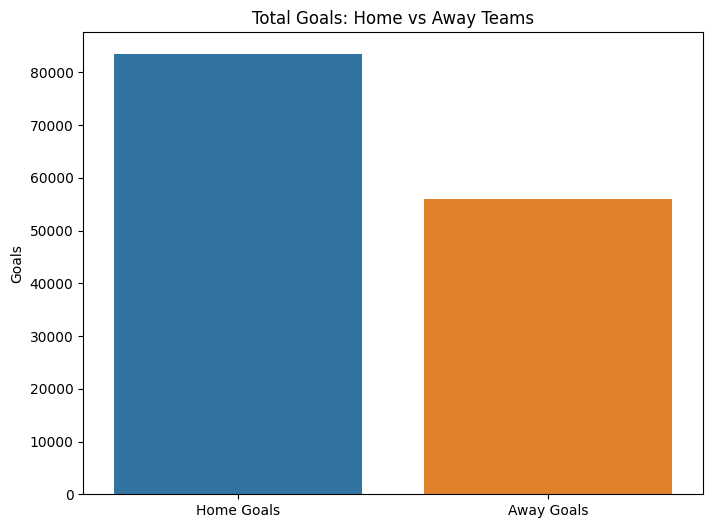

In [14]:
# Total goals scored by home teams and away teams
home_goals = match_result_df['home_score'].sum()
away_goals = match_result_df['away_score'].sum()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Home Goals', 'Away Goals'], y=[home_goals, away_goals])
plt.title('Total Goals: Home vs Away Teams')
plt.ylabel('Goals')
plt.show()


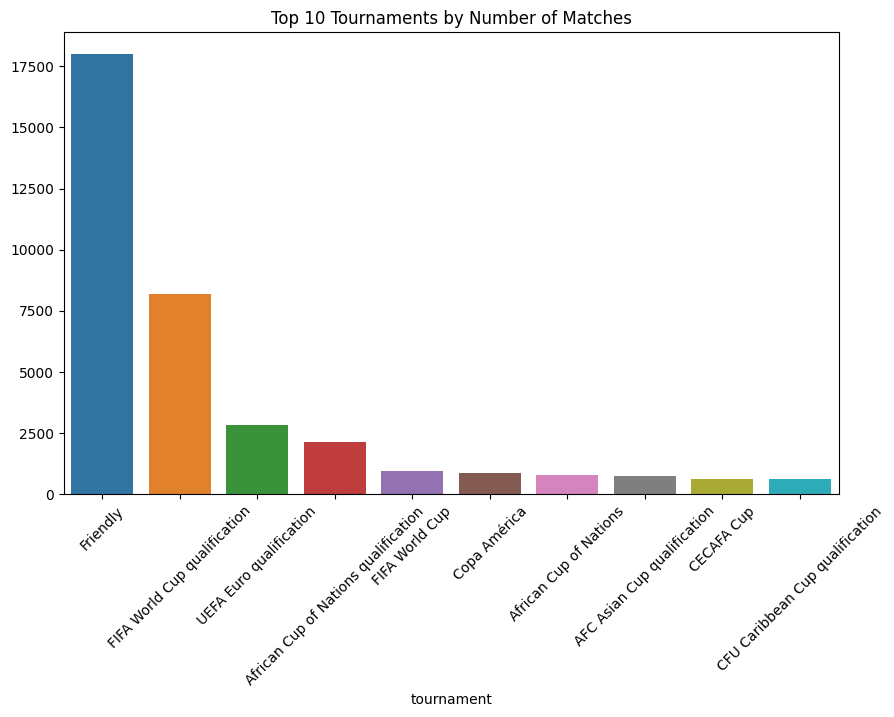

In [15]:
# Top 10 tournaments by number of matches
top_tournaments = match_result_df['tournament'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_tournaments.index, y=top_tournaments.values)
plt.title('Top 10 Tournaments by Number of Matches')
plt.xticks(rotation=45)
plt.show()


In [16]:
# Merge goal scorer dataset with match result dataset
merged_df = pd.merge(goal_scorer_df, match_result_df, on=['date', 'home_team', 'away_team'], how='left')

# Merge the result with penalty shootout dataset
final_merged_df = pd.merge(merged_df, penalty_shootout_df, on=['date', 'home_team', 'away_team'], how='left')

# Display the merged dataframe
final_merged_df.head()


,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,result,winner,first_shooter
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False,0,4,Copa América,Buenos Aires,Argentina,True,Away Win,NaN,NaN
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False,0,4,Copa América,Buenos Aires,Argentina,True,Away Win,NaN,NaN
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False,0,4,Copa América,Buenos Aires,Argentina,True,Away Win,NaN,NaN
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False,0,4,Copa América,Buenos Aires,Argentina,True,Away Win,NaN,NaN
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False,6,1,Copa América,Buenos Aires,Argentina,False,Home Win,NaN,NaN


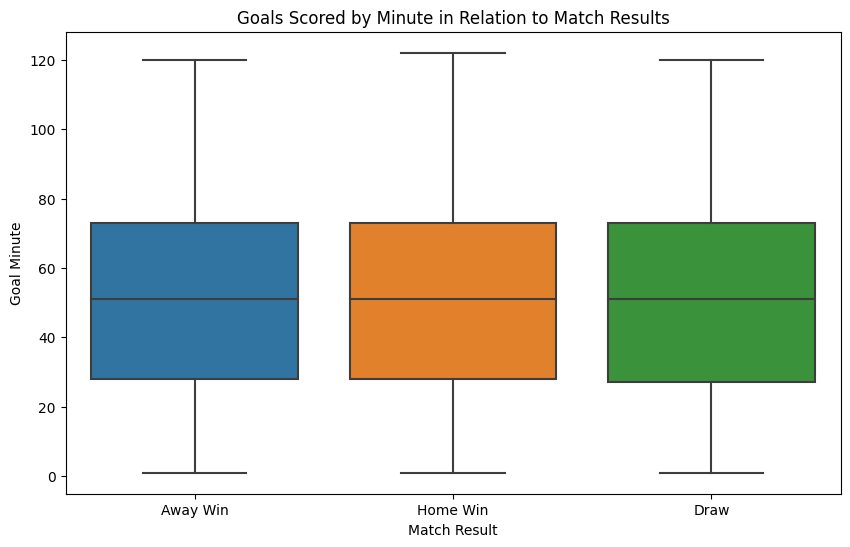

In [17]:
# Relationship between goals scored and match result
plt.figure(figsize=(10, 6))
sns.boxplot(x='result', y='minute', data=final_merged_df)
plt.title('Goals Scored by Minute in Relation to Match Results')
plt.xlabel('Match Result')
plt.ylabel('Goal Minute')
plt.show()


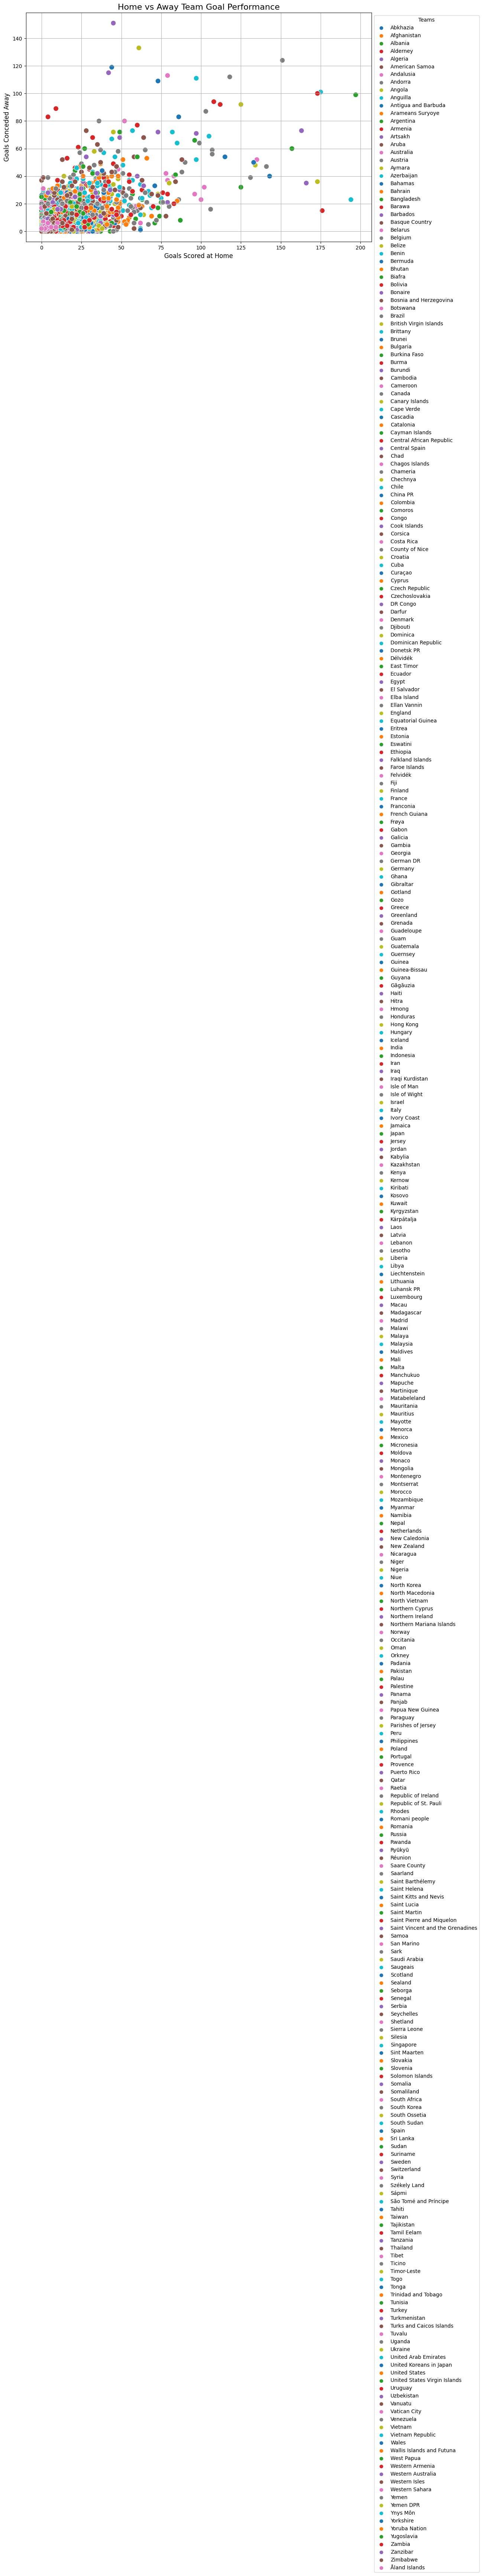

In [18]:
# Home vs Away performance comparison (goals scored vs conceded)
home_away_performance = match_result_df.groupby(['home_team', 'away_team']).agg({
    'home_score': 'sum', 'away_score': 'sum', 'date': 'count'
}).reset_index()

# Plot the performance for home vs away
plt.figure(figsize=(12, 8))
sns.scatterplot(x='home_score', y='away_score', data=home_away_performance, hue='home_team', s=100, palette='tab10')
plt.title('Home vs Away Team Goal Performance', fontsize=16)
plt.xlabel('Goals Scored at Home', fontsize=12)
plt.ylabel('Goals Conceded Away', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Teams")
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


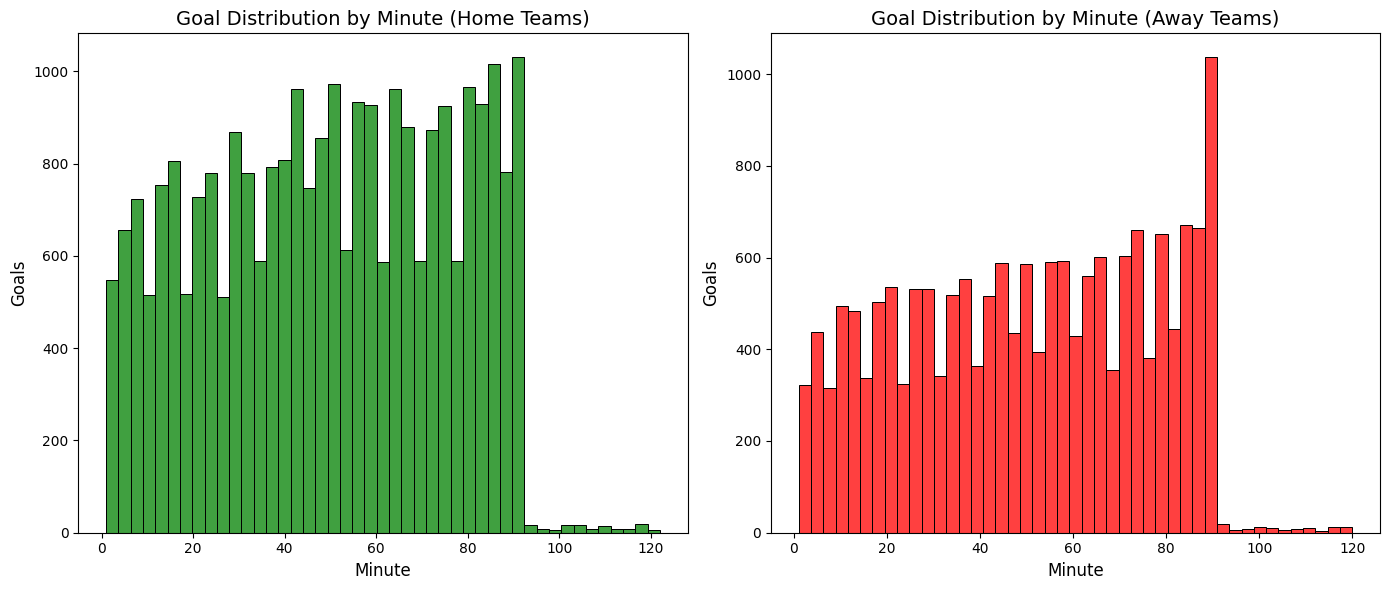

In [19]:
# Plot goal distribution by minute for home and away teams
plt.figure(figsize=(14, 6))

# Home goals
plt.subplot(1, 2, 1)
sns.histplot(goal_scorer_df[goal_scorer_df['team'] == goal_scorer_df['home_team']]['minute'], bins=45, color='green')
plt.title('Goal Distribution by Minute (Home Teams)', fontsize=14)
plt.xlabel('Minute', fontsize=12)
plt.ylabel('Goals', fontsize=12)

# Away goals
plt.subplot(1, 2, 2)
sns.histplot(goal_scorer_df[goal_scorer_df['team'] == goal_scorer_df['away_team']]['minute'], bins=45, color='red')
plt.title('Goal Distribution by Minute (Away Teams)', fontsize=14)
plt.xlabel('Minute', fontsize=12)
plt.ylabel('Goals', fontsize=12)

plt.tight_layout()
plt.show()


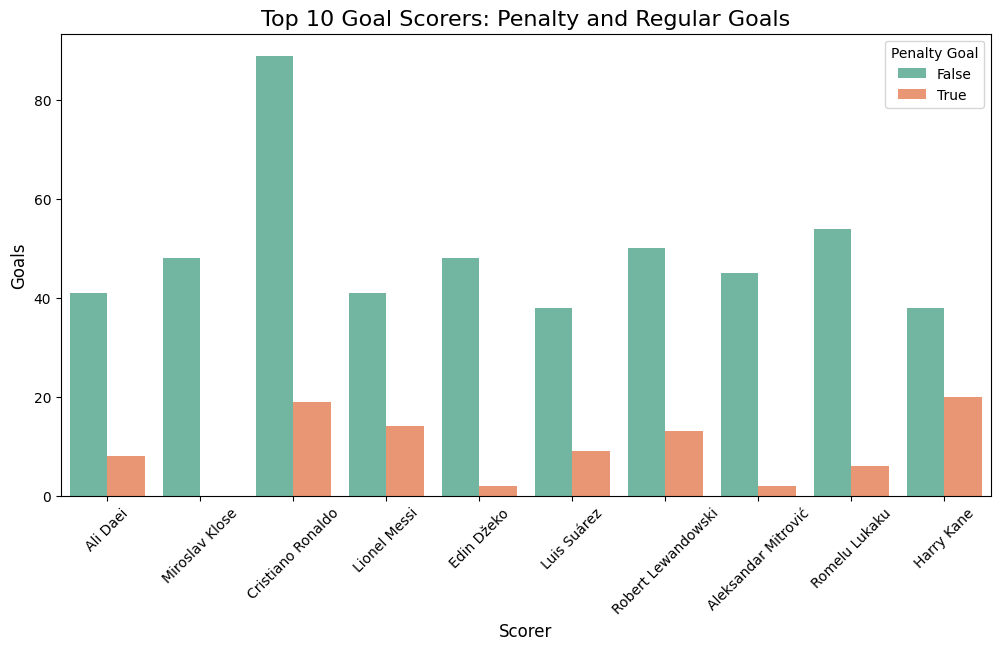

In [20]:
# Top 10 scorers with penalty and own goals breakdown
top_scorers = goal_scorer_df['scorer'].value_counts().nlargest(10).index
top_scorer_data = goal_scorer_df[goal_scorer_df['scorer'].isin(top_scorers)]

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(x='scorer', hue='penalty', data=top_scorer_data, palette='Set2')
plt.title('Top 10 Goal Scorers: Penalty and Regular Goals', fontsize=16)
plt.xlabel('Scorer', fontsize=12)
plt.ylabel('Goals', fontsize=12)
plt.legend(title="Penalty Goal", loc='upper right')
plt.xticks(rotation=45)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


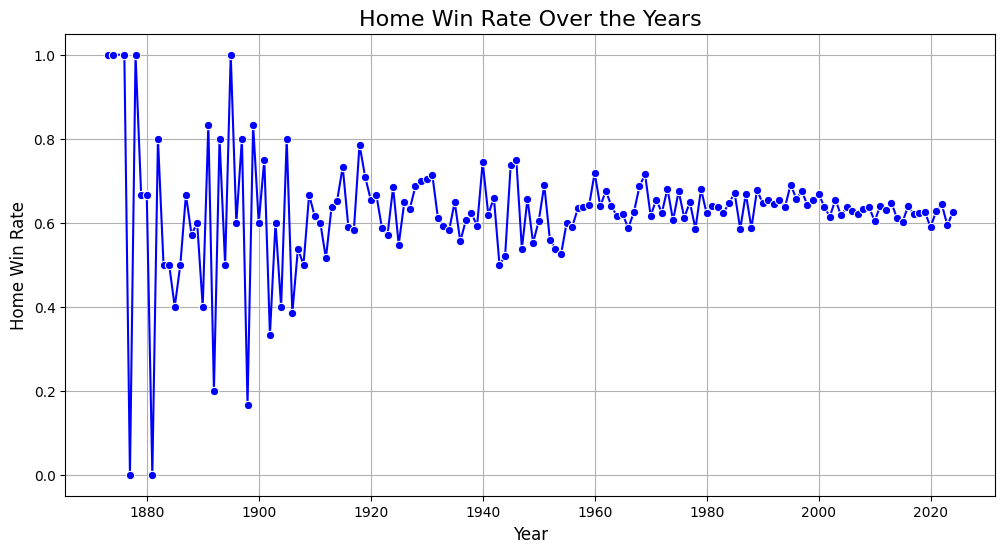

In [21]:
# Add result for home win, draw, and away win
match_result_df['result'] = match_result_df.apply(
    lambda x: 'Home Win' if x['home_score'] > x['away_score'] 
              else ('Away Win' if x['home_score'] < x['away_score'] else 'Draw'), axis=1)

# Group by year and calculate win ratios
match_result_df['year'] = match_result_df['date'].dt.year
win_loss_ratio = match_result_df.groupby(['year', 'result']).size().unstack(fill_value=0)
win_loss_ratio['home_win_rate'] = win_loss_ratio['Home Win'] / (win_loss_ratio['Home Win'] + win_loss_ratio['Away Win'])

# Plot home win rate over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x=win_loss_ratio.index, y=win_loss_ratio['home_win_rate'], marker='o', color='blue')
plt.title('Home Win Rate Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Home Win Rate', fontsize=12)
plt.grid(True)
plt.show()


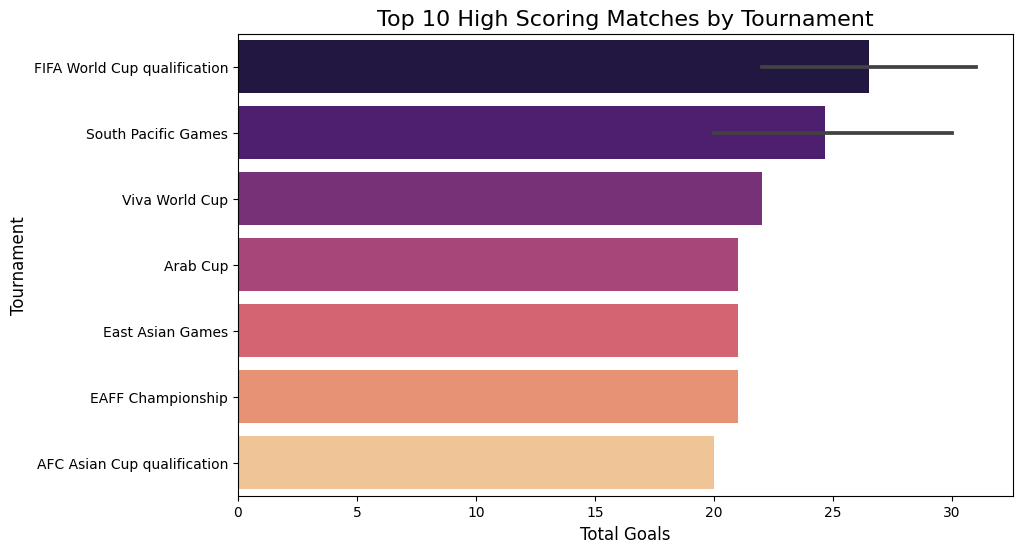

In [22]:
# Calculate total goals in each match
match_result_df['total_goals'] = match_result_df['home_score'] + match_result_df['away_score']

# Top 10 matches by total goals
top_scoring_matches = match_result_df.nlargest(10, 'total_goals')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='total_goals', y='tournament', data=top_scoring_matches, palette='magma')
plt.title('Top 10 High Scoring Matches by Tournament', fontsize=16)
plt.xlabel('Total Goals', fontsize=12)
plt.ylabel('Tournament', fontsize=12)
plt.show()
